In [1]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt        
%matplotlib inline
import warnings                        
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("MIS_AIP_31072019.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
Veh.Reg.No                  366 non-null object
Vehicle Type                366 non-null object
Veh. Cat.                   0 non-null float64
Vehicle Make                363 non-null object
Vehicle Model               329 non-null object
Reg Type                    366 non-null object
Fuel Type                   295 non-null object
refId                       366 non-null object
Customer Name               366 non-null object
Customer Mobile             366 non-null float64
Inspection Time Taken       269 non-null object
QC Time Taken               259 non-null object
QC Done Date                0 non-null float64
approvalTime                0 non-null float64
qcDoneBy                    0 non-null float64
Current Status              347 non-null object
Created Date                366 non-null object
Created Time                366 non-null object
Company Name                366 no

In [4]:
df.head()

,Veh.Reg.No,Vehicle Type,Veh. Cat.,Vehicle Make,Vehicle Model,Reg Type,Fuel Type,refId,Customer Name,Customer Mobile,...,Agent Mobile,Address,breakingId,Refer Time,Insp Summary,Re Accept Reject Details,Manager Approval Time,Amount Collected,id,Insp Done By
0,rj02sz0032,Bike,NaN,Hero,NaN,Private,PETROL,IFFC-ALW-20190731-1,GAJENDRA KUMAR,9.190000e+11,...,9.200000e+11,Vill Nangali Balihari TEH .Behror Alwar,IFFC-ALW-20190731-1,NaN,RC VERIFIED,NaN,NaN,NaN,5d40ea62621c77174da3edf3,self
1,hr55y7418,Car,NaN,Maruti,Swift,Commercial,PETROL+CNG,IFFC-IFFCO_GUR-20190731-1,RAJNISH KUMAR,9.200000e+11,...,9.200000e+11,H no 33 Housing colony Bhondsi gurgaon,IFFC-IFFCO_GUR-20190731-1,NaN,RC VERIFIED\nMINOR DENT & SCRATCH ARE MENTION ...,NaN,NaN,NaN,5d40f513621c77174da3ee00,client
2,rj14xs2006,Bike,NaN,Hero,Splendor Plus,Private,PETROL,IFFC-26-20190731-1,SURENDRA SINGH,9.180000e+11,...,9.200000e+11,"36, BASANT VIHAR - B MEENAWALA JAIPUR",IFFC-26-20190731-1,NaN,DAMAGES ARE MENTIONED IN REPORT,NaN,0:00:00,NaN,5d40fce3ce45f85e99df68f5,self
3,ts07fd2799,Car,NaN,Hyundai,NaN,Private,DIESEL,IFFC-CTK-20190731-1,SANTOSH KUMAR NAYAK,9.190000e+11,...,9.180000e+11,"Pno-12,jagruti shine,Rr nagar,old bowenpally,R...",IFFC-CTK-20190731-1,NaN,RC NOT VERIFIED AND PROPER IMAGES HAS NOT BEEN...,NaN,NaN,NaN,5d410217621c77174da3ee11,client
4,or02br2878,Car,NaN,Maruti,Alto K10,Private,NaN,IFFC-IFFCO_BSHR-20190731-1,KASHINATH PRAHARAJ,9.190000e+11,...,9.200000e+11,QR NO 2RA 9/5 BJB nagar laxmisagar Bhubaneswar...,IFFC-IFFCO_BSHR-20190731-1,NaN,NaN,NaN,NaN,NaN,5d410adbce45f85e99df6920,self


In [5]:
df = df.drop(['Veh. Cat.','QC Done Date','approvalTime','qcDoneBy','Login Status','Inspection Started','Amount Collected'],axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 28 columns):
Veh.Reg.No                  366 non-null object
Vehicle Type                366 non-null object
Vehicle Make                363 non-null object
Vehicle Model               329 non-null object
Reg Type                    366 non-null object
Fuel Type                   295 non-null object
refId                       366 non-null object
Customer Name               366 non-null object
Customer Mobile             366 non-null float64
Inspection Time Taken       269 non-null object
QC Time Taken               259 non-null object
Current Status              347 non-null object
Created Date                366 non-null object
Created Time                366 non-null object
Company Name                366 non-null object
Branch Name                 366 non-null object
Branch Code                 364 non-null object
Agent Name                  366 non-null object
Agent Code                  36

In [7]:
df['Vehicle Type'].value_counts()

Car                      182
Bike                      97
Scooty                    31
Tractor                   17
Truck                     13
Scooter                    8
3-wheeler Passenger        6
Mini Truck                 6
Bus                        3
Earth-moving Vehicles      2
Mini Bus                   1
Name: Vehicle Type, dtype: int64

In [8]:
df['Reg Type'].value_counts()

Private       328
Commercial     38
Name: Reg Type, dtype: int64

In [9]:
df['Fuel Type'].value_counts()

PETROL        156
DIESEL        120
PETROL+CNG     17
CNG ONLY        1
PET/LPG         1
Name: Fuel Type, dtype: int64

In [10]:
df['Current Status'].value_counts()

Recommended            196
Awaiting Inspection     79
Not Recommended         40
Refer to U/W            22
Awaiting QC              8
In Suspecious            2
Name: Current Status, dtype: int64

In [11]:
df['Company Name'].value_counts()

IFFCO TOKIO GI                                      288
HDFC ERGO General Insurance                          38
ICICI Lombard Motor Insurance                        18
FUTURE GENERALI INDIA INSURANCE COMPANY LIMITED      13
SBI General Insurance Co Ltd                          9
Name: Company Name, dtype: int64

In [12]:
df['Insp Done By'].value_counts()

self      297
client     69
Name: Insp Done By, dtype: int64

In [13]:
df['Insp Done By'].replace('self', 0,inplace=True)
df['Insp Done By'].replace('client', 1,inplace=True)
df['Company Name'].replace('IFFCO TOKIO GI', 0,inplace=True)
df['Company Name'].replace('HDFC ERGO General Insurance', 1,inplace=True)
df['Company Name'].replace('ICICI Lombard Motor Insurance', 2,inplace=True)
df['Company Name'].replace('FUTURE GENERALI INDIA INSURANCE COMPANY LIMITED ', 3,inplace=True)
df['Company Name'].replace('SBI General Insurance Co Ltd', 4,inplace=True)

In [16]:
df['Current Status'].replace('Recommended', 0,inplace=True)
df['Current Status'].replace('Not Recommended', 1,inplace=True)
df['Current Status'].replace('Awaiting Inspection', 2,inplace=True)
df['Current Status'].replace('Refer to U/W', 2,inplace=True)
df['Current Status'].replace('Awaiting QC', 2,inplace=True)
df['Current Status'].replace('In Suspecious', 2,inplace=True)

In [18]:
df['Fuel Type'].replace('PETROL', 0,inplace=True)
df['Fuel Type'].replace('DIESEL', 1,inplace=True)
df['Fuel Type'].replace('PETROL+CNG', 2,inplace=True)
df['Fuel Type'].replace('CNG ONLY', 2,inplace=True)
df['Fuel Type'].replace('PET/LPG', 2,inplace=True)


In [20]:
df['Reg Type'].replace('Private', 0,inplace=True)
df['Reg Type'].replace('Commercial', 1,inplace=True)


In [21]:
df['Vehicle Type'].replace('Car', 0,inplace=True)
df['Vehicle Type'].replace('Tractor', 0,inplace=True)
df['Vehicle Type'].replace('Truck', 0,inplace=True)
df['Vehicle Type'].replace('Bus', 0,inplace=True)
df['Vehicle Type'].replace('Mini Truck', 0,inplace=True)
df['Vehicle Type'].replace('Earth-moving Vehicles', 0,inplace=True)
df['Vehicle Type'].replace('Mini Bus', 0,inplace=True)
df['Vehicle Type'].replace('Bike', 1,inplace=True)
df['Vehicle Type'].replace('Scooty', 1,inplace=True)
df['Vehicle Type'].replace('Scooter', 1,inplace=True)
df['Vehicle Type'].replace('3-wheeler Passenger', 2,inplace=True)

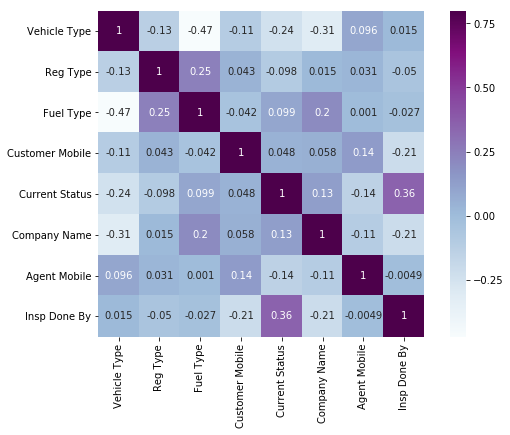

In [24]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu",annot = True);

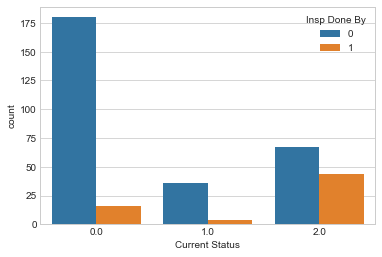

In [31]:
sns.set_style('whitegrid')
sns.countplot(x='Current Status',hue='Insp Done By',data=df)

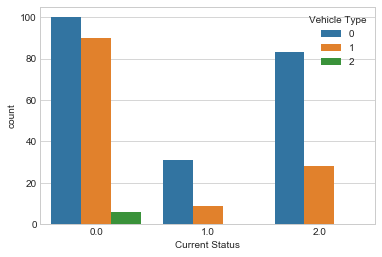

In [30]:
sns.set_style('whitegrid')
sns.countplot(x='Current Status',hue='Vehicle Type',data=df)

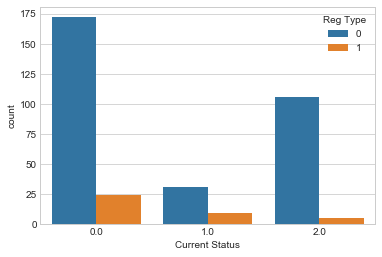

In [33]:
sns.set_style('whitegrid')
sns.countplot(x='Current Status',hue='Reg Type',data=df)

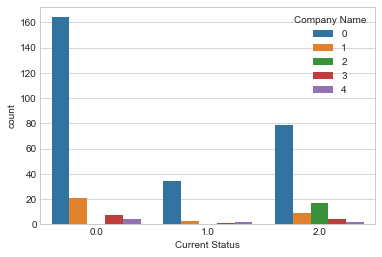

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='Current Status',hue='Company Name',data=df)

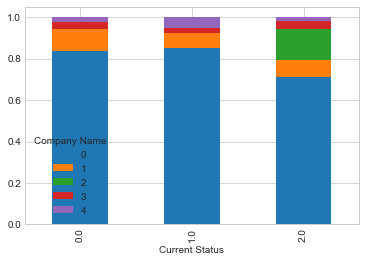

In [38]:
CS=pd.crosstab(df['Current Status'],df['Company Name'])
CS.div(CS.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

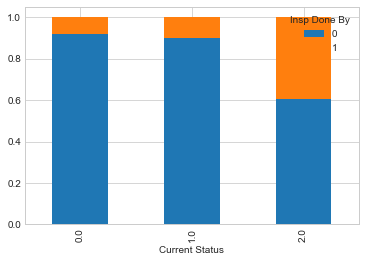

In [39]:
CS=pd.crosstab(df['Current Status'],df['Insp Done By'])
CS.div(CS.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

In [45]:
gb = df.groupby(["Agent Name","Company Name"])
gb.first()

Veh.Reg.No  Vehicle Type  \
Agent Name              Company Name                              
AJAY KAMBLE  MULUND     1              mh46ap2938             0   
AKASH AKASH             0               up26u0001             0   
AKC BAJAJ               0              up70wd8178             1   
AKHTAR                  2                 dhr0002             0   
AMIT GARG               0               hp62d0231             1   
AMIT KUMAR VERMA        0              up52aq7611             1   
AMIT NFG                0               dl6cn1902             0   
                        1             dl09can1870             0   
ANKIT YADAV WADALA      1              mh04gu8528             0   
ANOOP                   0              hr51an3559             0   
                        1              hr51ar6211             0   
                        3              dl12cl7691             0   
ANURAG TYAGI            0              up14bz3540             0   
ARJUN MAKKAR            0               hr24y7600             1   
ARNAB BHATTACHARYA      0               wb88c2650             1   
ASHA MATHURIA           0              rj29ea0310             0   
ASHWANI NANDA           0              rj18ga2339             0   
Abhay Bindal            0              dl13su0928             1   
Abhinav agarwal         0              up32hd4421             1   
Aditya Bansal           0              hr51be4459             0   
Aftab Dadar             1              mh02ep3228             0   
Ajay Kabira             0               up14d5481             0   
Ajit  Praharaj          0              od02al1258             1   
Akshay Kumar            0              RJ08RA4640             0   
Altaf hussain rather    0               jk05d4100             0   
Aman                    0              up15by6257             1   
Aman Aggarwal           0              dl3cck5135             0   
Amit Sharma             0              dl11sk0781             1   
Amit singh              0              dl14cc1867             0   
Arib                    0               hr51y9867             0   
...                                           ...           ...   
Satyaprakash            3               hr55v2208             0   
                        4               hr72d0131             0   
Saurabh gupta           0              up93az5000             0   
Shivam Mittal           0              up70dl5164             1   
Siddhant                0              rj14cx9875             0   
Sonu Choudh Ary         0              rj03ra9787             0   
Sourav Kumar            0               br09u8700             0   
Sumeet                  0              hr20ac8039             1   
Sumit kumar             0              dl3scv5861             1   
Susanta Kumar Pradhan   0               od01y4567             1   
Tapas Kumar Das         0              od05ae7767             0   
VASIM SAIFI             0              up14bu6842             1   
VEERBHAN NAGLOI         0              dl2cad8539             0   
VIJAY PAL SINGH         0              rj20pa4106             2   
VIKAS KUMAR             0              rj18cc3451             0   
Varun Kochar            0               hr10s2133             0   
Vijay Mukhi             0              dl4sch3325             1   
Vinod Godara            0              rj07rb8608             0   
Vipul Tyagi             0              rj46ga2646             0   
Virender  Singh         0              pb11ag1245             1   
Vishnu Upadhyay         0              rj16rb2104             0   
YOGESH SHARMA           0               up17m8236             1   
Yogita Kansal           0              pb13at5365             1   
Yousuf                  0               up37d2444             1   
kaustav dyoti mukherjee 0              wb20ag5209             0   
lalit                   0              dl10ce6671             0   
                        4              hr26cq3853             0   
madhu sudan sharma 

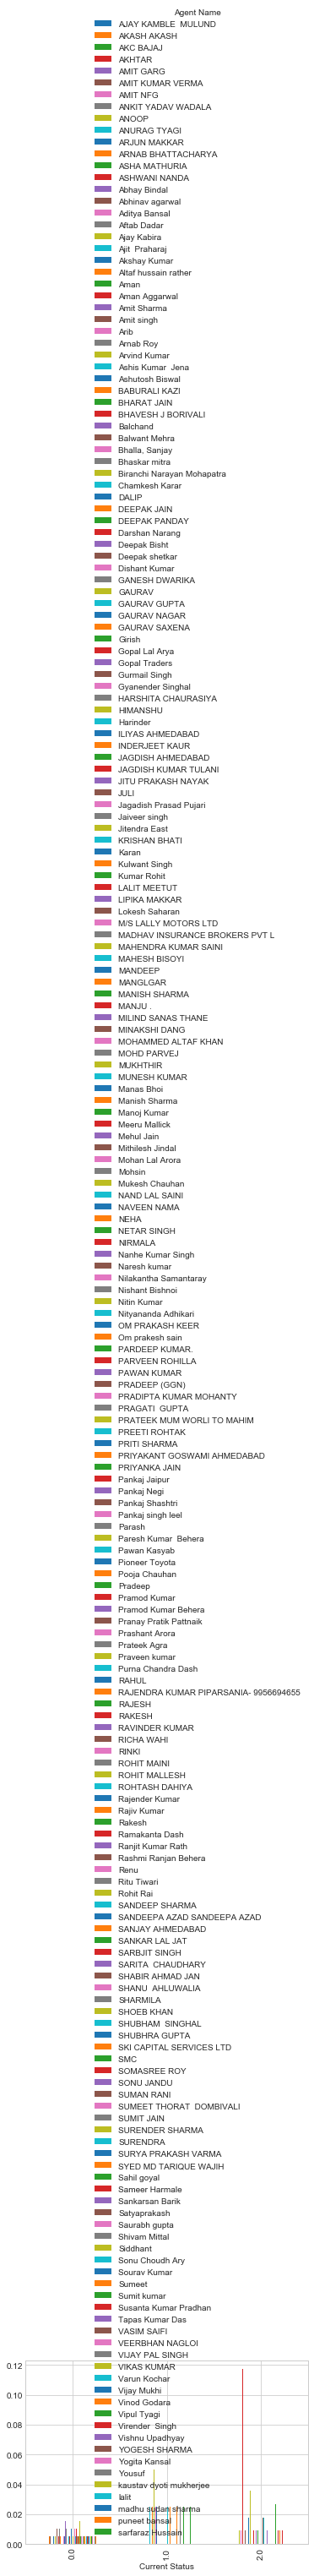

In [56]:
CS=pd.crosstab(df['Current Status'],df['Agent Name'])
CS.div(CS.sum(1).astype(float), axis=0).plot(kind="bar")
plt.show()